
# ISOLET — PCA vs t‑SNE (visuals only)

These panels justify the 2D visual choice fairly with labels used only for color.


Import dependencies for PCA, t‑SNE, scaling, and plotting.

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo


Set clear knobs so nothing is hidden and everything is reproducible.

In [6]:

PCA_FOR_CLUST = 50        # PCA size used later for clustering
PCA_FOR_PLOT  = 2         # 2D PCA for the left panel
TSNE_D        = 2         # 2D t-SNE for the right panel
RANDOM_STATE  = 42

def tsne_perplexity(n: int) -> int:
    """Choose a sane perplexity ~ n/200 clamped into [5, 50]."""
    return int(np.clip(n // 200, 5, 50))

TSNE_N_ITER = 1000
TSNE_LEARN  = "auto"      # avoids hard-coding a fixed rate


Load ISOLET from UCI and standardize features for fair distance geometry.

In [8]:

isolet = fetch_ucirepo(id=54)
X = isolet.data.features.values      # (7797, 617)
y_raw = isolet.data.targets.values.ravel()

# integer labels only for coloring (never used in fitting)
_, y = np.unique(y_raw, return_inverse=True)
C = len(np.unique(y)); D = X.shape[1]

X = StandardScaler().fit_transform(X)
print(f"Data used: X={X.shape}, classes={C}")


Data used: X=(7797, 617), classes=26


Fit PCA-50 to report the variance that backs the clustering pipeline.

In [10]:

pca50 = PCA(n_components=PCA_FOR_CLUST, svd_solver="full", random_state=RANDOM_STATE)
pca50.fit(X)
var50 = pca50.explained_variance_ratio_.sum()
print(f"PCA-{PCA_FOR_CLUST} cumulative explained variance: {100*var50:.2f}%")


PCA-50 cumulative explained variance: 80.42%


Compute unsupervised embeddings with labels strictly for coloring.

In [12]:

# 2D PCA for the left panel
X_pca2 = PCA(n_components=PCA_FOR_PLOT, svd_solver="full", random_state=RANDOM_STATE).fit_transform(X)

# t-SNE on PCA-50 for speed and stability
perp = tsne_perplexity(X.shape[0])
print(f"Running t-SNE({TSNE_D}D) with perplexity={perp} after PCA-{PCA_FOR_CLUST}…")
X_for_tsne = pca50.transform(X)
tsne = TSNE(n_components=TSNE_D, perplexity=perp, learning_rate=TSNE_LEARN,
            init="pca", n_iter=TSNE_N_ITER, random_state=RANDOM_STATE, verbose=0)
X_tsne2 = tsne.fit_transform(X_for_tsne)


Running t-SNE(2D) with perplexity=38 after PCA-50…


Pick a distinct colormap so classes are readable in dense clouds.

In [14]:

cmap = mpl.colormaps.get_cmap("tab20").resampled(C)


Show PCA 2D projection colored by true class for a linear baseline view.

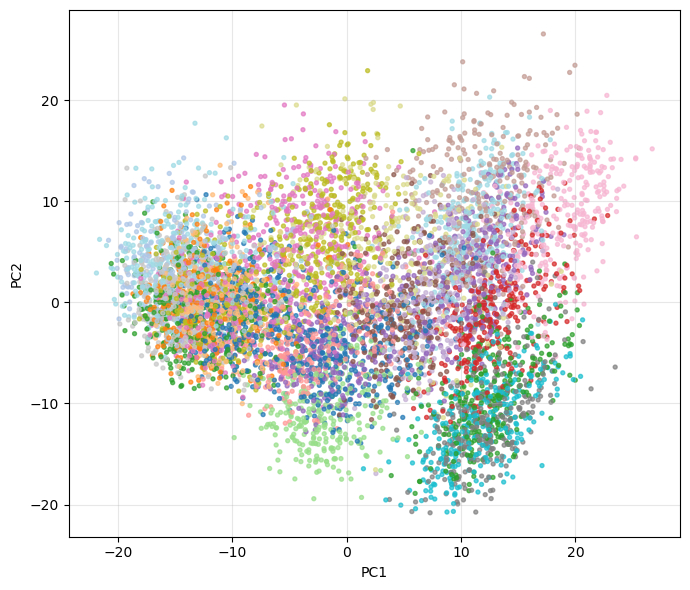

In [16]:

plt.figure(figsize=(7,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, s=8, alpha=0.7, cmap=cmap)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Show t‑SNE 2D embedding to highlight non‑linear separations for visuals only.

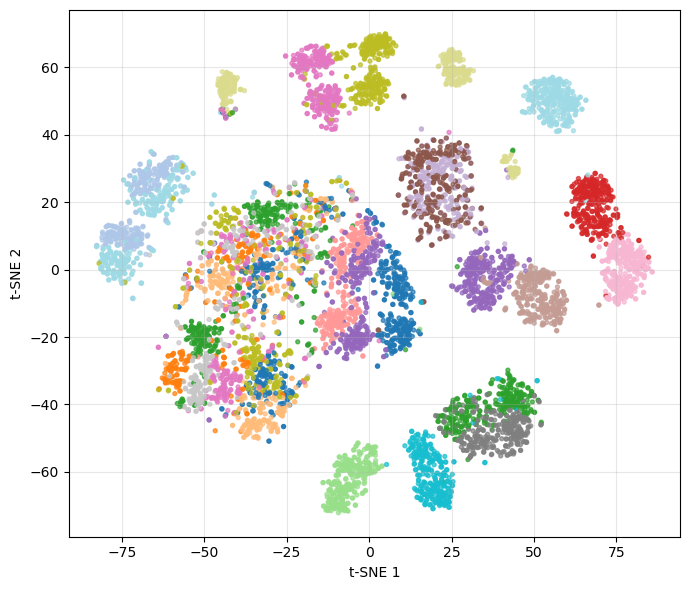

In [18]:

plt.figure(figsize=(7,6))
plt.scatter(X_tsne2[:,0], X_tsne2[:,1], c=y, s=8, alpha=0.7, cmap=cmap)
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Labels color the dots but never touch the fit so the comparison stays fair.